In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:

#load data in pandas
df=pd.read_csv('hepatitis_csv.csv')

In [3]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [4]:
num_rows = df.shape[0]

print("Number of rows:", num_rows)

Number of rows: 155


In [5]:
null_counts = df.isna().sum()

print(null_counts)

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64


In [6]:
#dropping columns that arent' useful
column_to_drop = 'protime'
df = df.drop(column_to_drop, axis=1)

In [7]:
column_to_drop = 'alk_phosphate'
df = df.drop(column_to_drop, axis=1)

In [8]:
null_counts = df.isna().sum()

print(null_counts)

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
sgot                4
albumin            16
histology           0
class               0
dtype: int64


In [9]:
#dropping rows with missing values

column_to_check = 'albumin'
df = df.dropna(subset=[column_to_check])

In [10]:
null_counts = df.isna().sum()

print(null_counts)

age                0
sex                0
steroid            1
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          7
liver_firm         8
spleen_palpable    4
spiders            4
ascites            4
varices            4
bilirubin          0
sgot               0
albumin            0
histology          0
class              0
dtype: int64


In [11]:
true_count = df['steroid'].value_counts().get(True, 0)
false_count = df['steroid'].value_counts().get(False, 0)

# Determine the most frequent value
most_frequent_value = True if true_count > false_count else False

# Fill missing values with the most frequent value
df['steroid'].fillna(most_frequent_value, inplace=True)

print(df)

     age     sex  steroid  antivirals fatigue malaise anorexia liver_big  \
0     30    male    False       False   False   False    False     False   
1     50  female    False       False    True   False    False     False   
2     78  female     True       False    True   False    False      True   
3     31  female     True        True   False   False    False      True   
4     34  female     True       False   False   False    False      True   
..   ...     ...      ...         ...     ...     ...      ...       ...   
150   46  female     True       False    True    True     True      True   
151   44  female     True       False    True   False    False      True   
152   61  female    False       False    True    True    False     False   
153   53    male    False       False    True   False    False      True   
154   43  female     True       False    True   False    False      True   

    liver_firm spleen_palpable spiders ascites varices  bilirubin   sgot  \
0        Fa

In [12]:
true_count = df['liver_big'].value_counts().get(True, 0)
false_count = df['liver_big'].value_counts().get(False, 0)

# Determine the most frequent value
most_frequent_value = True if true_count > false_count else False

# Fill missing values with the most frequent value
df['liver_big'].fillna(most_frequent_value, inplace=True)

print(df)

     age     sex  steroid  antivirals fatigue malaise anorexia  liver_big  \
0     30    male    False       False   False   False    False      False   
1     50  female    False       False    True   False    False      False   
2     78  female     True       False    True   False    False       True   
3     31  female     True        True   False   False    False       True   
4     34  female     True       False   False   False    False       True   
..   ...     ...      ...         ...     ...     ...      ...        ...   
150   46  female     True       False    True    True     True       True   
151   44  female     True       False    True   False    False       True   
152   61  female    False       False    True    True    False      False   
153   53    male    False       False    True   False    False       True   
154   43  female     True       False    True   False    False       True   

    liver_firm spleen_palpable spiders ascites varices  bilirubin   sgot  \

In [13]:
true_count = df['liver_firm'].value_counts().get(True, 0)
false_count = df['liver_firm'].value_counts().get(False, 0)

# Determine the most frequent value
most_frequent_value = True if true_count > false_count else False

# Fill missing values with the most frequent value
df['liver_firm'].fillna(most_frequent_value, inplace=True)

print(df)

     age     sex  steroid  antivirals fatigue malaise anorexia  liver_big  \
0     30    male    False       False   False   False    False      False   
1     50  female    False       False    True   False    False      False   
2     78  female     True       False    True   False    False       True   
3     31  female     True        True   False   False    False       True   
4     34  female     True       False   False   False    False       True   
..   ...     ...      ...         ...     ...     ...      ...        ...   
150   46  female     True       False    True    True     True       True   
151   44  female     True       False    True   False    False       True   
152   61  female    False       False    True    True    False      False   
153   53    male    False       False    True   False    False       True   
154   43  female     True       False    True   False    False       True   

     liver_firm spleen_palpable spiders ascites varices  bilirubin   sgot  

In [14]:
true_count = df['spleen_palpable'].value_counts().get(True, 0)
false_count = df['spleen_palpable'].value_counts().get(False, 0)

# Determine the most frequent value
most_frequent_value = True if true_count > false_count else False

# Fill missing values with the most frequent value
df['spleen_palpable'].fillna(most_frequent_value, inplace=True)

print(df)

     age     sex  steroid  antivirals fatigue malaise anorexia  liver_big  \
0     30    male    False       False   False   False    False      False   
1     50  female    False       False    True   False    False      False   
2     78  female     True       False    True   False    False       True   
3     31  female     True        True   False   False    False       True   
4     34  female     True       False   False   False    False       True   
..   ...     ...      ...         ...     ...     ...      ...        ...   
150   46  female     True       False    True    True     True       True   
151   44  female     True       False    True   False    False       True   
152   61  female    False       False    True    True    False      False   
153   53    male    False       False    True   False    False       True   
154   43  female     True       False    True   False    False       True   

     liver_firm  spleen_palpable spiders ascites varices  bilirubin   sgot 

In [15]:
true_count = df['spiders'].value_counts().get(True, 0)
false_count = df['spiders'].value_counts().get(False, 0)

# Determine the most frequent value
most_frequent_value = True if true_count > false_count else False

# Fill missing values with the most frequent value
df['spiders'].fillna(most_frequent_value, inplace=True)

print(df)

     age     sex  steroid  antivirals fatigue malaise anorexia  liver_big  \
0     30    male    False       False   False   False    False      False   
1     50  female    False       False    True   False    False      False   
2     78  female     True       False    True   False    False       True   
3     31  female     True        True   False   False    False       True   
4     34  female     True       False   False   False    False       True   
..   ...     ...      ...         ...     ...     ...      ...        ...   
150   46  female     True       False    True    True     True       True   
151   44  female     True       False    True   False    False       True   
152   61  female    False       False    True    True    False      False   
153   53    male    False       False    True   False    False       True   
154   43  female     True       False    True   False    False       True   

     liver_firm  spleen_palpable  spiders ascites varices  bilirubin   sgot

In [16]:
true_count = df['ascites'].value_counts().get(True, 0)
false_count = df['ascites'].value_counts().get(False, 0)

# Determine the most frequent value
most_frequent_value = True if true_count > false_count else False

# Fill missing values with the most frequent value
df['ascites'].fillna(most_frequent_value, inplace=True)

print(df)

     age     sex  steroid  antivirals fatigue malaise anorexia  liver_big  \
0     30    male    False       False   False   False    False      False   
1     50  female    False       False    True   False    False      False   
2     78  female     True       False    True   False    False       True   
3     31  female     True        True   False   False    False       True   
4     34  female     True       False   False   False    False       True   
..   ...     ...      ...         ...     ...     ...      ...        ...   
150   46  female     True       False    True    True     True       True   
151   44  female     True       False    True   False    False       True   
152   61  female    False       False    True    True    False      False   
153   53    male    False       False    True   False    False       True   
154   43  female     True       False    True   False    False       True   

     liver_firm  spleen_palpable  spiders  ascites varices  bilirubin   sgo

In [17]:
true_count = df['varices'].value_counts().get(True, 0)
false_count = df['varices'].value_counts().get(False, 0)

# Determine the most frequent value
most_frequent_value = True if true_count > false_count else False

# Fill missing values with the most frequent value
df['varices'].fillna(most_frequent_value, inplace=True)

print(df)

     age     sex  steroid  antivirals fatigue malaise anorexia  liver_big  \
0     30    male    False       False   False   False    False      False   
1     50  female    False       False    True   False    False      False   
2     78  female     True       False    True   False    False       True   
3     31  female     True        True   False   False    False       True   
4     34  female     True       False   False   False    False       True   
..   ...     ...      ...         ...     ...     ...      ...        ...   
150   46  female     True       False    True    True     True       True   
151   44  female     True       False    True   False    False       True   
152   61  female    False       False    True    True    False      False   
153   53    male    False       False    True   False    False       True   
154   43  female     True       False    True   False    False       True   

     liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin   sg

In [18]:
null_counts = df.isna().sum()

print(null_counts)

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
sgot               0
albumin            0
histology          0
class              0
dtype: int64


In [19]:
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,sgot,albumin,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,18.0,4.0,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,42.0,3.5,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,32.0,4.0,False,live
3,31,female,True,True,False,False,False,True,False,False,False,False,False,0.7,52.0,4.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,200.0,4.0,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,242.0,3.3,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,142.0,4.3,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,20.0,4.1,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,19.0,4.1,True,live


In [20]:
columns=['sex','steroid','antivirals','fatigue','malaise','anorexia','liver_big','liver_firm','spleen_palpable','spiders','ascites','varices','histology','class']
df_encoded = pd.get_dummies(df, columns=columns, prefix=columns)

print(df_encoded)

     age  bilirubin   sgot  albumin  sex_female  sex_male  steroid_False  \
0     30        1.0   18.0      4.0           0         1              1   
1     50        0.9   42.0      3.5           1         0              1   
2     78        0.7   32.0      4.0           1         0              0   
3     31        0.7   52.0      4.0           1         0              0   
4     34        1.0  200.0      4.0           1         0              0   
..   ...        ...    ...      ...         ...       ...            ...   
150   46        7.6  242.0      3.3           1         0              0   
151   44        0.9  142.0      4.3           1         0              0   
152   61        0.8   20.0      4.1           1         0              1   
153   53        1.5   19.0      4.1           0         1              1   
154   43        1.2   19.0      3.1           1         0              0   

     steroid_True  antivirals_False  antivirals_True  ...  spiders_False  \
0          

In [21]:
null_counts = df_encoded.isna().sum()

print(null_counts)

age                      0
bilirubin                0
sgot                     0
albumin                  0
sex_female               0
sex_male                 0
steroid_False            0
steroid_True             0
antivirals_False         0
antivirals_True          0
fatigue_False            0
fatigue_True             0
malaise_False            0
malaise_True             0
anorexia_False           0
anorexia_True            0
liver_big_False          0
liver_big_True           0
liver_firm_False         0
liver_firm_True          0
spleen_palpable_False    0
spleen_palpable_True     0
spiders_False            0
spiders_True             0
ascites_False            0
ascites_True             0
varices_False            0
varices_True             0
histology_False          0
histology_True           0
class_die                0
class_live               0
dtype: int64


In [23]:
y=df_encoded['age'].values
x=df_encoded.drop(['age'],axis=1)

In [24]:
y.shape

(139,)

In [25]:
X=x.values

In [27]:
X.shape

(139, 31)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [30]:
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate mean squared error (MSE) as a performance metric
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 160.11353057098088


In [53]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 12.653597534732203


In [31]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


R-squared Score: -0.27898975992795516


In [32]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 10.373615229128264


In [33]:
coefficients = model.coef_

# Get the intercept of the model
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-4.77073946e-03  1.58928144e-02 -4.10946679e+00 -5.85313895e-02
  5.85313895e-02 -9.23319166e-01  9.23319166e-01  1.26961699e+00
 -1.26961699e+00 -2.77623898e+00  2.77623898e+00 -1.48918803e+00
  1.48918803e+00  5.35827286e+00 -5.35827286e+00  1.94372160e+00
 -1.94372160e+00 -5.43951999e-02  5.43951999e-02  2.04711351e+00
 -2.04711351e+00 -1.55877564e+00  1.55877564e+00  4.64918693e+00
 -4.64918693e+00  1.60449119e+00 -1.60449119e+00 -5.10089515e-01
  5.10089515e-01  3.46257684e+00 -3.46257684e+00]
Intercept: 49.33676191092766


In [51]:
feature_column_to_plot = 1

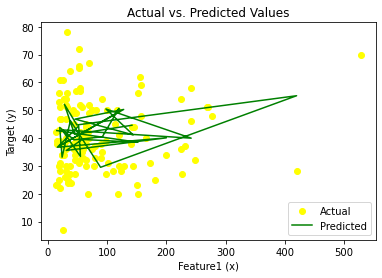

In [52]:
slope = model.coef_[0]
intercept = model.intercept_

plt.scatter(X[:,feature_column_to_plot], y, color='yellow', label='Actual')
plt.plot(X_test[:,feature_column_to_plot], y_pred, color='green', label='Predicted')
plt.xlabel('Feature1 (x)')
plt.ylabel('Target (y)')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()